# Cut images into peaces

Este Notebook explora como cortar imagenes en cuadrados. 

In [ ]:
!conda install -c conda-forge opencv -y

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
from sklearn.utils import shuffle

ModuleNotFoundError: No module named 'cv2'

In [3]:


def readImage(path):
    # OpenCV reads the image in bgr format by default
    bgr_img = cv2.imread(path)
    # We flip it to rgb for visualization purposes
    b,g,r = cv2.split(bgr_img)
    rgb_img = cv2.merge([r,g,b])
    return rgb_img

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import PIL

PIL.Image.MAX_IMAGE_PIXELS = 933120000

In [6]:
path = '/Users/gsidoni/Documents/GitHub/ACDC/Data/101_img_patch.tif'
X_batch = np.asarray(Image.open(path))


(14450, 15584, 3)
15 16


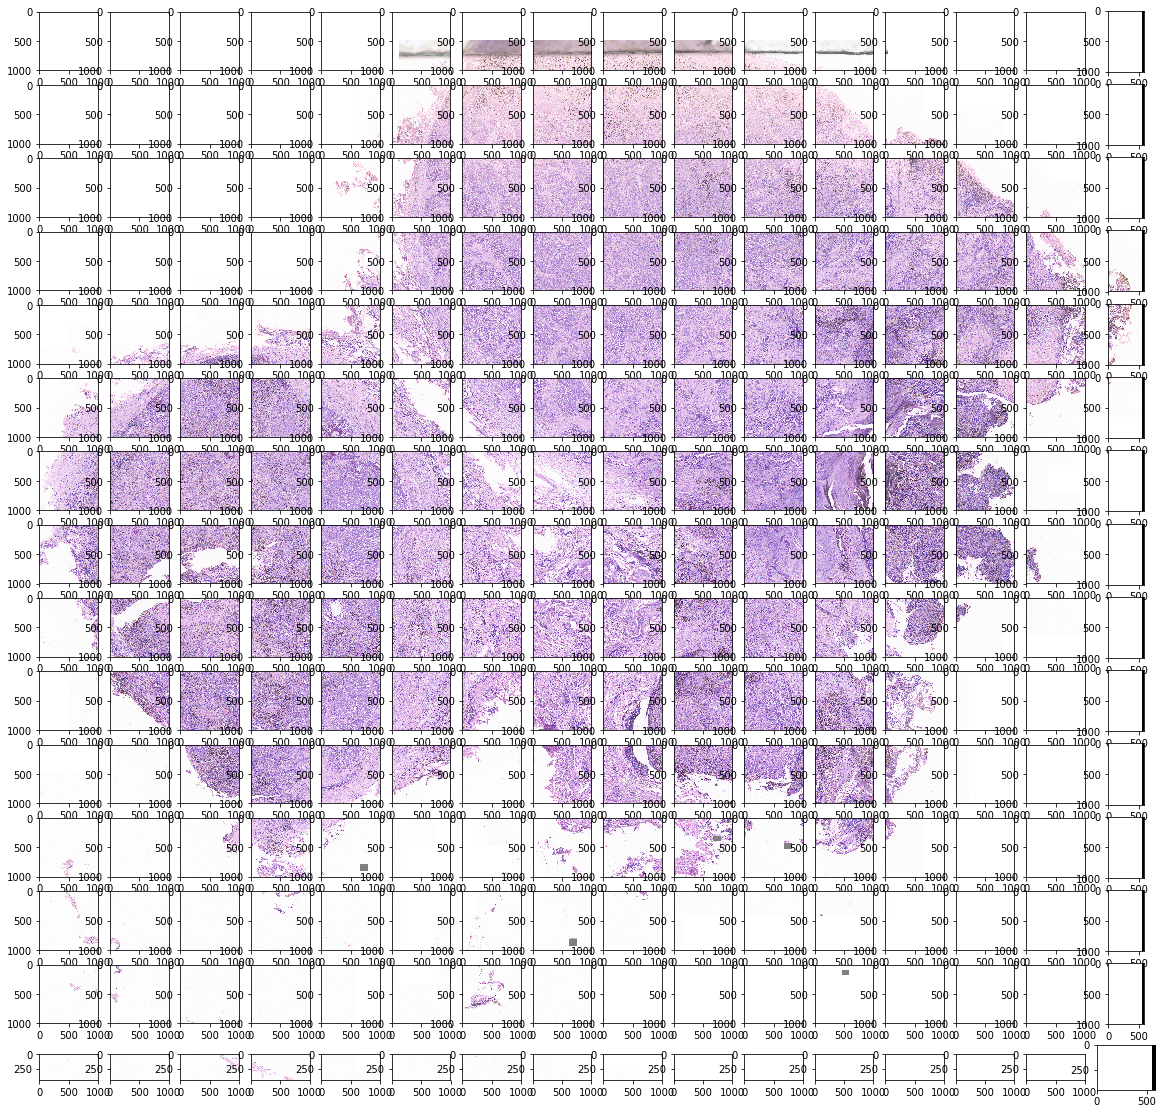

In [8]:
IMAGE_SIZE = 1000

fil = int(np.ceil(X_batch.shape[0] / IMAGE_SIZE))
col = int(np.ceil(X_batch.shape[1] / IMAGE_SIZE))
print(X_batch.shape)
print(fil, col)

pedazo = []
_, ax = plt.subplots(fil, col, figsize=[20,20])
for i in range(0, col):
    col_init = i * IMAGE_SIZE 
    if i * IMAGE_SIZE <= X_batch.shape[1]:
        col_end = (i+1) * IMAGE_SIZE 
    else:
        col_end = X_batch.shape[1]

    tira = []
    for j in range(0, fil):
        fil_init = j * IMAGE_SIZE 
        if j * IMAGE_SIZE <= X_batch.shape[0]:
            fil_end = (j+1) * IMAGE_SIZE 
        else:
            fil_end = X_batch.shape[0]
        #print(fil_init,fil_end, col_init,col_end)
        section = X_batch[fil_init:fil_end, col_init:col_end, :]
        ax[j,i].imshow(Image.fromarray(section))
        if len(tira) == 0:
            tira = section
        else:
            tira = np.append(tira, section, axis=0)
    
    if len(pedazo) == 0:
        pedazo = tira
    else:
        pedazo = np.append(pedazo, tira, axis=1)
plt.show()
            

In [119]:
tira.shape, section.shape, pedazo.shape

((14450, 584, 3), (450, 584, 3), (14450, 15584, 3))

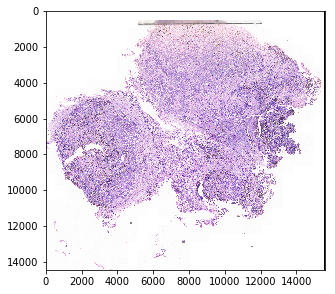

In [123]:
_, ax = plt.subplots(1,1, figsize = [5,5])
ax.imshow(Image.fromarray(pedazo))
plt.show()